<a href="https://colab.research.google.com/github/khairooo/Intro-to-AI-projects-/blob/main/apriori_algorithm%2C_association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apriori algorithm and Association rule

> In this project we are going to use One of the most known technics in  Unpupervised Machine learning  *Apriori Algorithm*


## Learning Outcomes
You should walk away from this tutorial with:
- 1.**Association Rule**
      - Antecedent X
      - Concequent Y
      - Other Buzzwords ( Items, Itemset, Support and support %)
      - Min_support Or threshold 
      - Association rule's Terminology (Support, confidence, Lift)

- 2.**Apriori Algorithms and how it works** :
      - Data Preprocessing for Apriori Algorithm using `MLxtend`
      - Building a recommendation system 
      - Prediction and Interpretations 
    





## **`1.Association Rule:`**

- Association rule mining is the technique used to unveil the association between items, where the items we purchase are denoted as `X->Y`



```
X- Antecedent
Y- Consequent
```






`Examples:`
- If a customer buys the bread and milk then he will buy the cheese.
- If a customer buys a television then he will buy a VCR in a year.

`Example:`

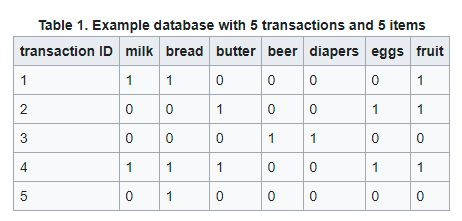


Using WIKIPEDIA definition:
Look at the **table 01** Apove!

To illustrate the concepts, we use a small example from the supermarket domain. Table 1 is shows a small database containing the items where, in each entry, the value 1 means the presence of the item in the corresponding transaction, and the value 0 represents the absence of an item in that transaction. The set of items is `I= {milk,bread,butter,beer,diapers,eggs,fruit}`

An example rule for the supermarket could be `{butter,bread} => {milk}` meaning that if butter and bread are bought, customers also buy milk.

In order to select interesting rules from the set of all possible rules, constraints on various measures of significance and interest are used. The best-known constraints are minimum thresholds on support and confidence.

Let `X,Y` be itemsets, `X => Y` an association rule and T a set of transactions of a given database.


###1.2 Buzzwords( Item, Itemset, Support, Support%:

`The table below would represent briefly the definition of esach item `

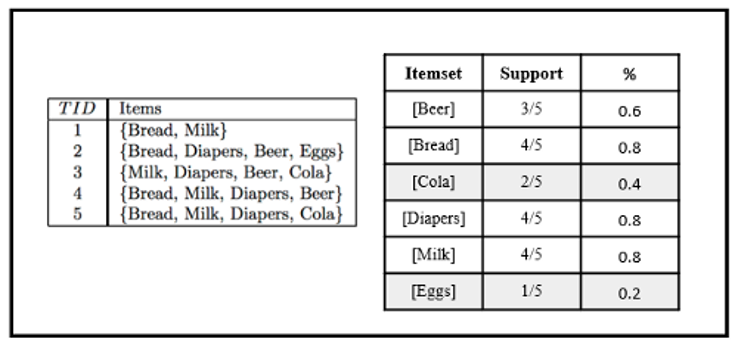

- Where:
---
1. Items is the purchased pairs of each transaction.
2. Itemset is only the product 
3. Support: is an indication of how frequently the itemset appears in the dataset.
4. Support%: is the support in percentage 


Let's dive deeper with each concept taking **Table01** and **Table02** Below:

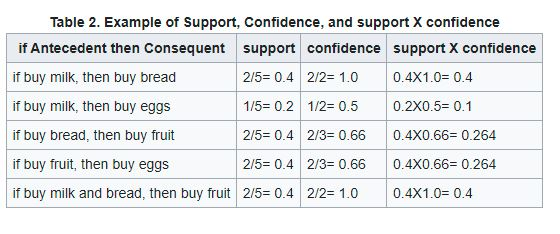



Using **`Table 1`** as an example, the itemset `X = {beer,diapers}` has a support of `1/5=0.2` since it occurs in `20%` of all transactions (1 out of 5 transactions). The argument of support of `X` is a set of preconditions, and thus becomes more restrictive as it grows (instead of more inclusive).

- Furthermore, the itemset ` Y={milk,bread,butter} `has a support of` 1/5=0.2` as it appears in `20%` of all transactions as well.

### 1.3 Mimimum Support or Threshold
- Minimum support thresholds (`Min_support`) are useful for determining which itemsets are preferred or interesting.


### 1.4 Association Rule's Terminology 

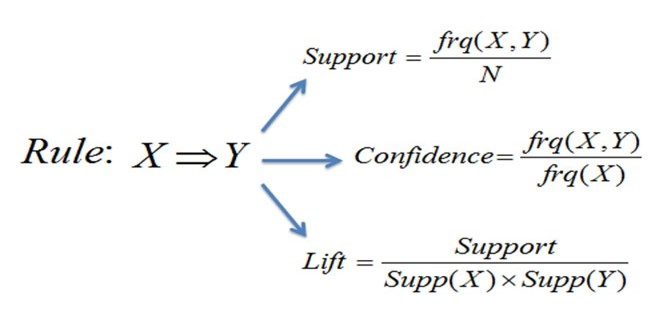

- For example Assume there are 100 customers where `{10 of them bought milk}`, `8 bought butter` and `6 bought both of them`. We need to check the association of` bought milk => bought butter`



```
- Support = P(Milk & Butter) = 6/100 = 0.06
- Confidence = support/P(Butter) = 0.06/0.08 = 0.75
- Lift = confidence/P(Milk) = 0.75/0.10 = 7.5
```








# 2. Apriori Algorithm 

```
The Apriori algorithm is considered one of the most basic Association Rule Mining algorithms.
 It works on the principle that Having prior knowledge of frequent itemsets can generate strong association rules.
- The word Apriori means prior knowledge.

```




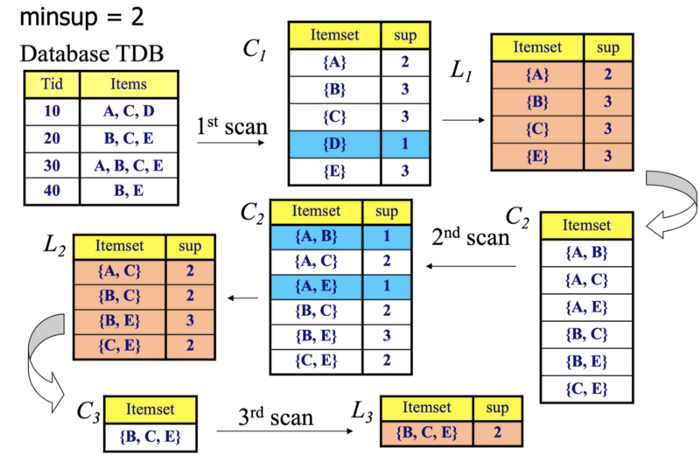

# CODING PART:

In this section, we are going to use the [Glocerie Dataset](https://www.kaggle.com/heeraldedhia/groceries-dataset) from Kaggle. For futher information about the dataset please check out the link 

## Loading Packages:

In [142]:
# import the necessary libraries 
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import altair as alt
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
import holoviews as hv
from holoviews import opts
#hv.extension('bokeh')
#Apriori libraries 
from mlxtend.frequent_patterns import apriori, association_rules
# Matplotlib for the sty;e and the background visualization color 
plt.style.use("dark_background")

from wordcloud import wordcloud, STOPWORDS

In [143]:
# pip install apyori 

In [144]:
# it is possible to use apyori API to import apriori algorithms "check below"
#from apyori import apriori


In [145]:
df = pd.read_csv("/content/Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [146]:
df.shape

(38765, 3)

depending on the code above:
```
- 38765 rows 
- 3 columns
```



In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [148]:
df["Date"] = pd.to_datetime(df["Date"])

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


- The Dataset fortunately doesn't contain any missing values 

In [150]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [151]:
df.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [152]:
df["Date"].count()

38765

In [153]:
df["year"] = df["Date"].apply(lambda x : x.year)
df["month"] = df["Date"].apply(lambda x : x.month)
df["day"] = df["Date"].apply(lambda x : x.day)

In [154]:
df

,Member_number,Date,itemDescription,year,month,day
0,1808,2015-07-21,tropical fruit,2015,7,21
1,2552,2015-05-01,whole milk,2015,5,1
2,2300,2015-09-19,pip fruit,2015,9,19
3,1187,2015-12-12,other vegetables,2015,12,12
4,3037,2015-01-02,whole milk,2015,1,2
...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10
38761,2022,2014-02-23,candy,2014,2,23
38762,1097,2014-04-16,cake bar,2014,4,16
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12


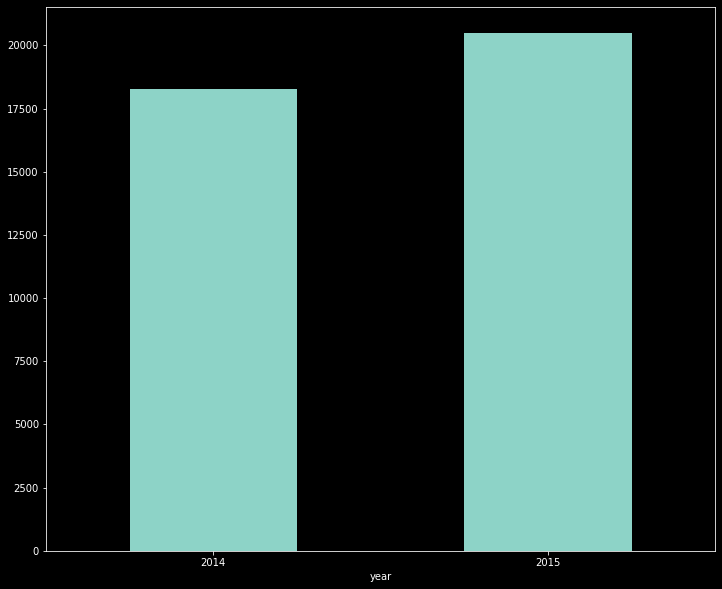

In [155]:
# Counting the number of purchased items in each Day 
plt.figure(figsize=(12,10))
df.groupby("year")["itemDescription"].count().sort_values(ascending = True).head(10).plot.bar(rot = 0)

Text(0.5, 1.0, 'Top 10 Purchased product')

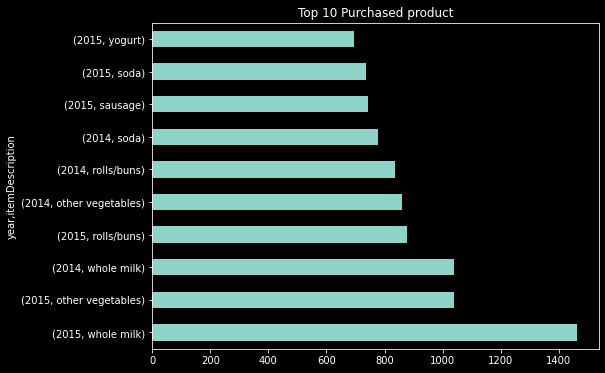

In [156]:
# Counting the number of purchased items in each Day 
plt.figure(figsize=(8,6))
df.groupby("year")["itemDescription"].value_counts().sort_values(ascending = False).head(10).plot.barh()
plt.title("Top 10 Purchased product")

- The bar graph Above illustrates that `Whole milk` and `other vegetables` are the most purchased products.

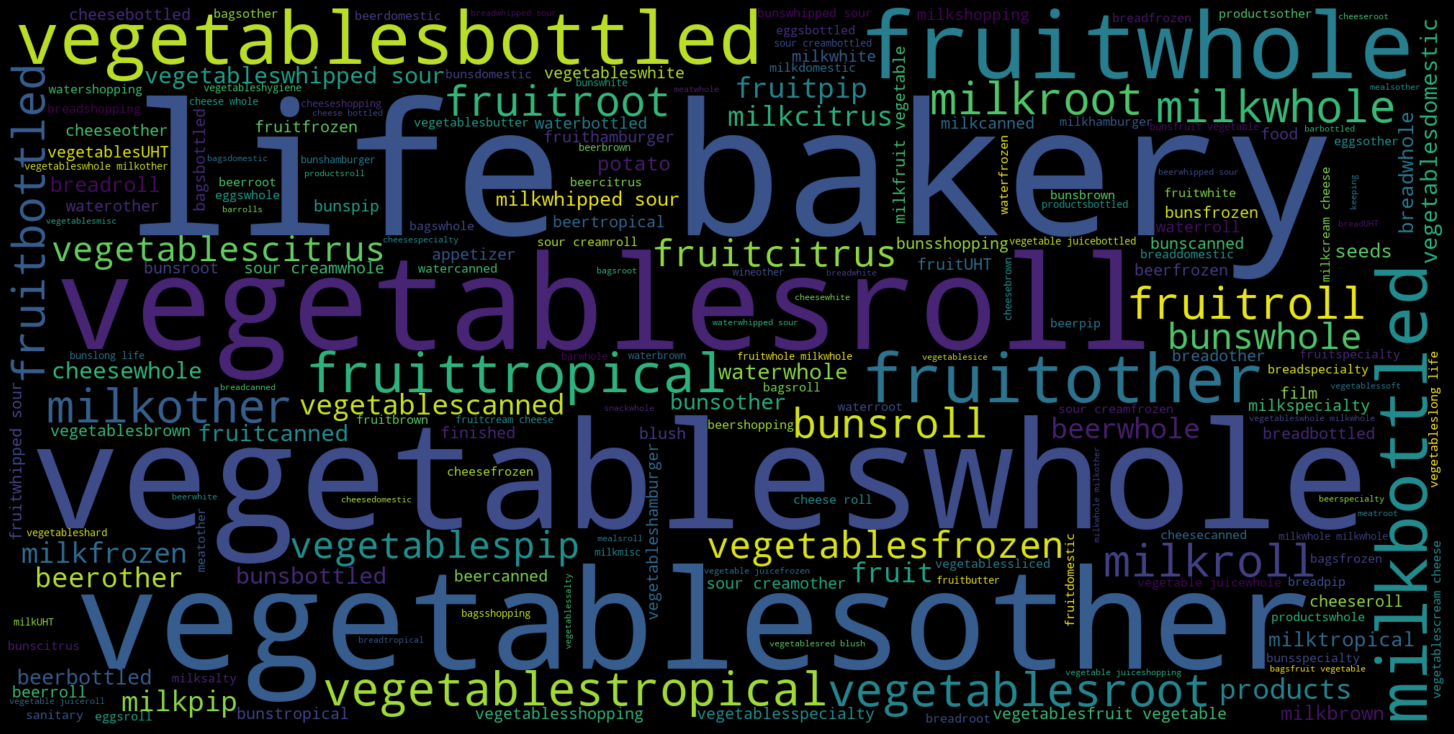

In [157]:
#Wordcloud
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'Black').generate("".join(df['itemDescription']))
fig = plt.figure(
    figsize = (20, 20),
    facecolor = 'k',
    edgecolor = 'k')

#Display plot
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Association Rule Mining 

We want now to identify an association between different items in a set, then find frequent patterns in a transactional database, relational databases(RDBMS).

`Algorithms used in Market Basket Analysis`
There are Multiple Techniques and Algorithms are used in Market Basket Analysis. One of the important objectives is “to predict the probability of items that are being bought together by customers”.



```
AIS
SETM Algorithm
Apriori Algorithm
FP Growth
> Apriori Algorithm:
```

`Apriori Algorithm `is a widely-used and well-known Association Rule algorithm and is a popular algorithm used in market basket analysis. It is also considered accurate and overtop AIS and SETM algorithms. It helps to find frequent itemsets in transactions and identifies association rules between these items. The limitation of the Apriori Algorithm is frequent itemset generation. It needs to scan the database many times which leads to increased time and reduce performance as it is a computationally costly step because of a huge database. It uses the concept of Confidence, Support.

- Before proceeding with apriori we have to prepare the data in a sparse matrix format where products are in column and id as index . Initially we group by based on the quantity purchased and later we encode it with 0s and 1s

## Important:


```
This part is a mandatory step before passing to Association rules and Apriori Algorithm`
```

In [158]:
#Creating temporary data which has quantity purchased column
new_df=df.copy()
new_df['qty_purchased']=df['Member_number'].map(df['Member_number'].value_counts())

In [159]:
#Creating sparse matrix 
basket_qnt = (new_df.groupby(['Member_number', 'itemDescription'])['qty_purchased']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Member_number'))

In [160]:
basket_qnt

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.0,0.0,26.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,13.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,0.0,24.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [161]:
type(basket_qnt)

pandas.core.frame.DataFrame

In [162]:
basket_qnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3898 entries, 1000 to 5000
Columns: 167 entries, Instant food products to zwieback
dtypes: float64(167)
memory usage: 5.0 MB


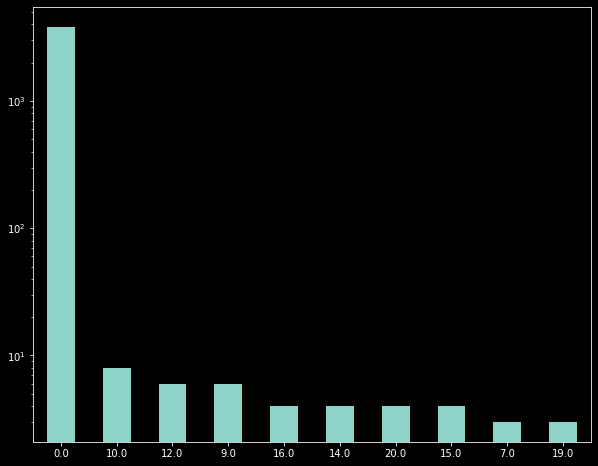

In [163]:
plt.figure(figsize = (10,8))
basket_qnt["Instant food products"].value_counts().head(10).plot.bar(rot = 0,logy = True)  # As we can see we used the parameter "logy" to  hange the scale 

In [164]:
basket_qnt.index

Int64Index([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1008, 1009, 1010,
            ...
            4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999, 5000],
           dtype='int64', name='Member_number', length=3898)

In [165]:
#Eoding the quantity purchased
def encode(x):
    '''Encoding the quantity of products with 0s and 1s
    0:when qty is less than or equal to 0
    1:when qty is greater than or equal to 1'''
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
#Appying on our data
basket_sets = basket_qnt.applymap(encode)
basket_sets

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
basket_sets.shape

(3898, 167)

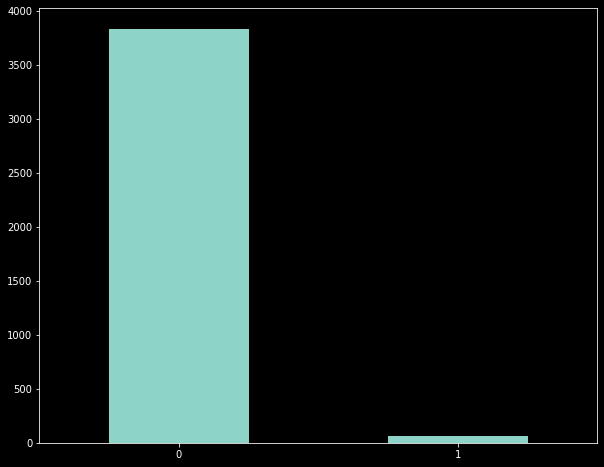

In [167]:
plt.figure(figsize = (10,8))
basket_sets["Instant food products"].value_counts().head(10).plot.bar(rot = 0)  # As we can see we used the parameter "logy" to  hange the scale 

In [168]:
#Apriori- Support70%
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

#Associaton rules-using lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,"(whole milk, other vegetables)",(yogurt),0.191380,0.282966,0.071832,0.375335,1.326434,0.017678,1.147870
94,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
95,(whole milk),"(other vegetables, yogurt)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235
96,(yogurt),"(whole milk, other vegetables)",0.282966,0.191380,0.071832,0.253853,1.326434,0.017678,1.083727
97,(other vegetables),"(whole milk, yogurt)",0.376603,0.150590,0.071832,0.190736,1.266589,0.015119,1.049608


In [169]:
#Apriori- Support70%
association_r = apriori(basket_sets, min_support=0.07, use_colnames=True)

#Associaton rules-using lift
rules = association_rules(association_r, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(bottled beer),0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
2,(other vegetables),(bottled water),0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450
3,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969
4,(bottled water),(rolls/buns),0.213699,0.349666,0.079271,0.370948,1.060863,0.004548,1.033832
...,...,...,...,...,...,...,...,...,...
93,"(whole milk, other vegetables)",(yogurt),0.191380,0.282966,0.071832,0.375335,1.326434,0.017678,1.147870
94,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
95,(whole milk),"(other vegetables, yogurt)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235
96,(yogurt),"(whole milk, other vegetables)",0.282966,0.191380,0.071832,0.253853,1.326434,0.017678,1.083727


In [187]:
association_r

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.158799,(bottled beer)
4,0.213699,(bottled water)
...,...,...
78,0.075680,"(yogurt, tropical fruit)"
79,0.079785,"(whole milk, whipped/sour cream)"
80,0.150590,"(whole milk, yogurt)"
81,0.082093,"(whole milk, other vegetables, rolls/buns)"


In [171]:
ru = rules[["antecedents","consequents"]].values.tolist()

In [172]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(bottled beer),0.458184,0.158799,0.085428,0.186450,1.174124,0.012669,1.033988
1,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672
2,(other vegetables),(bottled water),0.376603,0.213699,0.093894,0.249319,1.166680,0.013414,1.047450
3,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,0.013414,1.111969
4,(bottled water),(rolls/buns),0.213699,0.349666,0.079271,0.370948,1.060863,0.004548,1.033832
...,...,...,...,...,...,...,...,...,...
93,"(whole milk, other vegetables)",(yogurt),0.191380,0.282966,0.071832,0.375335,1.326434,0.017678,1.147870
94,"(other vegetables, yogurt)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,0.016704,1.344507
95,(whole milk),"(other vegetables, yogurt)",0.458184,0.120318,0.071832,0.156775,1.303003,0.016704,1.043235
96,(yogurt),"(whole milk, other vegetables)",0.282966,0.191380,0.071832,0.253853,1.326434,0.017678,1.083727


In [173]:
ru[1], ru[2], ru[93]

([frozenset({'bottled beer'}), frozenset({'whole milk'})],
 [frozenset({'other vegetables'}), frozenset({'bottled water'})],
 [frozenset({'other vegetables', 'whole milk'}), frozenset({'yogurt'})])